In [1]:
!pip install transformers torch seaborn matplotlib --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.9 MB/s eta 0:00:00


In [2]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel


In [3]:
# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [4]:
def get_attention_weights(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract attention from last layer
    attention = outputs.attentions[-1]  # Shape: (batch, num_heads, seq_len, seq_len)
    avg_attention = attention.mean(dim=1).squeeze().numpy()  # Average across heads
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())

    return tokens, avg_attention


In [5]:
def plot_attention(tokens, attention, title="Attention Heatmap"):
    plt.figure(figsize=(12, 6))
    sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="viridis", annot=False)
    plt.xlabel("Tokens")
    plt.ylabel("Attention to Tokens")
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


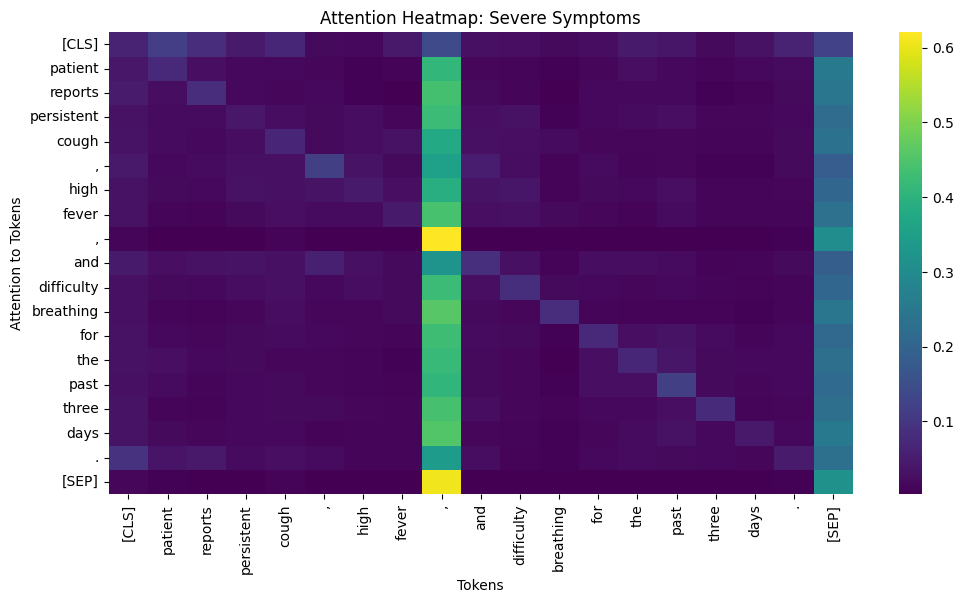

In [6]:
text1 = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
tokens1, attention1 = get_attention_weights(text1)
plot_attention(tokens1, attention1, title="Attention Heatmap: Severe Symptoms")


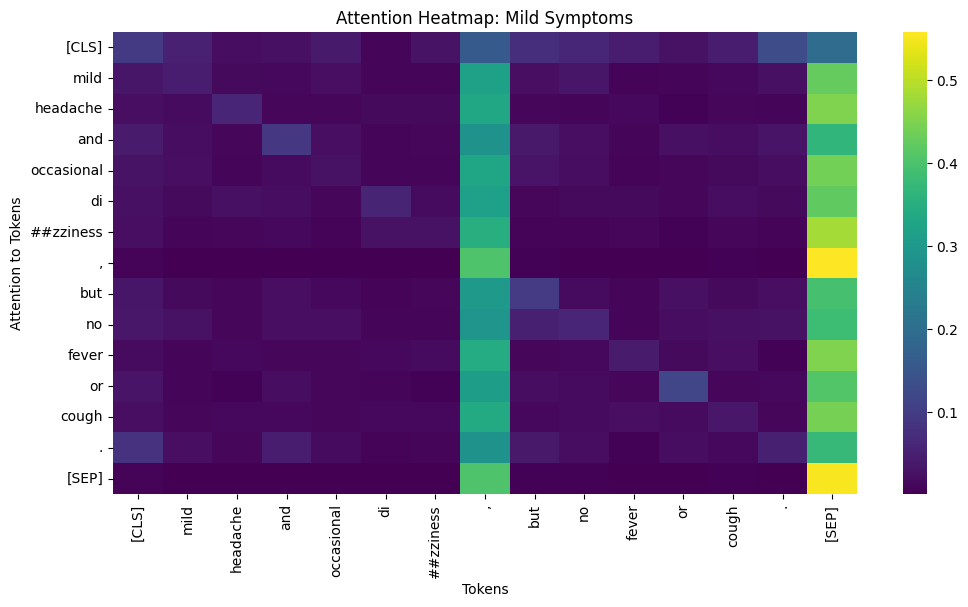

In [7]:
text2 = "Mild headache and occasional dizziness, but no fever or cough."
tokens2, attention2 = get_attention_weights(text2)
plot_attention(tokens2, attention2, title="Attention Heatmap: Mild Symptoms")


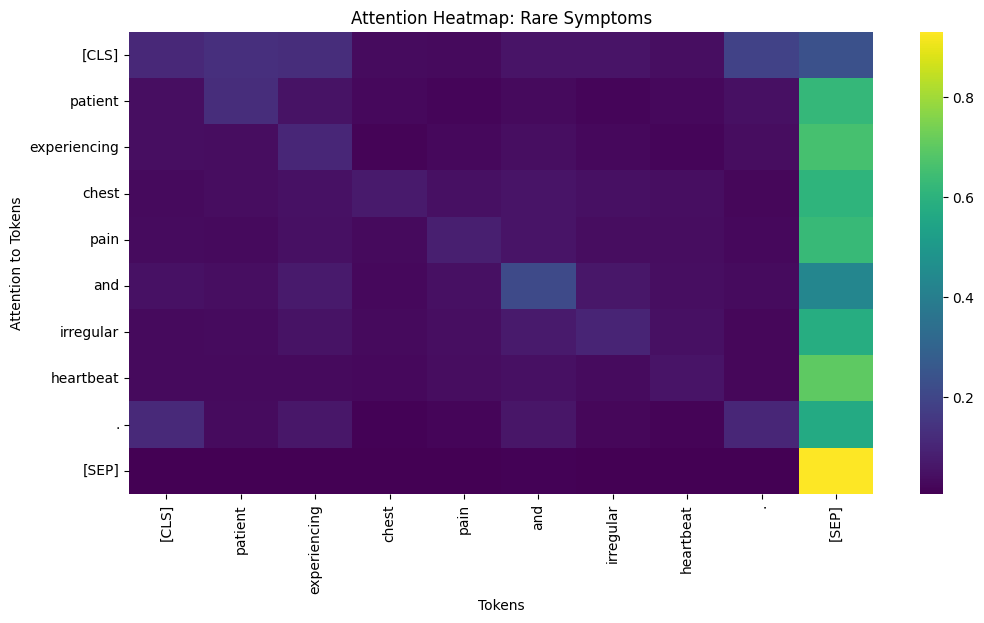

In [8]:
text3 = "Patient experiencing chest pain and irregular heartbeat."
tokens3, attention3 = get_attention_weights(text3)
plot_attention(tokens3, attention3, title="Attention Heatmap: Rare Symptoms")
